# Model Evaluation & Scoring Matrices

**Introduction:**

In this tutorial, we'll discuss various model evaluation metrics provided in scikit-learn.
In scikit-learn, the default choice for classification is accuracy which is a number of labels correctly classified and for regression is r2 which is a coefficient of determination.
Scikit-learn has a metrics module that provides other metrics that can be used for other purposes like when there is class imbalance etc. It also lets the user create custom evaluation metrics for a specific task.
We'll start by importing necessary libraries for our tutorial and setting few defaults.

# Importing necessary libraries ##

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics, datasets, neighbors
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
np.set_printoptions(precision=2)
print("Python Verion : ", sys.version)
print("Scikit-Learn Version : ",sklearn.__version__)

%matplotlib inline

Python Verion :  3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Scikit-Learn Version :  0.22.2.post1


# Classification Metrics 
We'll be using scikit-learn's in-built methods to create the dataset and use various metrics to evaluate the performance of a model trained on that dataset. We'll create a classification dataset with 500 samples, 20 features, and 2 classes


In [ ]:
X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

## 1 - Splitting Data Into Train/Test Sets ##

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

## 2 -Model Initialization and Fitting to Train Data###
We'll be using a simple LinearSVC model for training purpose. We'll then proceed to introduce various classification metrics which will be evaluating model performance on test data from various angles.

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=1, C=0.1)
linear_svc.fit(X_train, Y_train)

## 3- Classification Accuracy #
t refers to number of true predictions divided by total number of samples.

In [ ]:
Y_preds = linear_svc.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
print('Test Accuracy : %.3f'%(Y_preds == Y_test).mean())
print('Test Accuracy : %.3f'%linear_svc.score(X_test, Y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy : %.3f'%linear_svc.score(X_train, Y_train))

##4 -Confusion Matrix
For binary and multi-class classification problems, confusion matrix is another metrics which helps in indentifying which classes are easy to predict and which are hard to predict. It provides how many samples for each class are correctly classified and how many are confused with other classes.

Confusion Matrix for binary classification problems has the below-mentioned structure.

[[TN, FP ]

[FN, TP ]]

 - TN refers to True Negative which is the count of labels which were originally belonged to negative class and model also predicted them as negative.

 - FP refers to False positive which is the count of labels which were actually belonged to negative class but model predicted them as positive.

 - FN refers to False Negative which is the count of labels which were actually belonged to Positive Class but model predicted them as negative.

 - TP refers to True Positive which is the count of labels predicted positive which were actually positive.

Below we are plotting the confusion matrix as it helps in interpreting results fast.


In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, Y_preds)
print(conf_mat)

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

## 5 Classification Report

Classification report metrics provides precision, recall, f1-score and support for each class.

 - Precision - It represents how many of predictions of particular class are actually of that class.  Precision=TP/(TP+FP) .

-  Recall - It represents how many predictions of particular class is right.  Recall=TP/(TP+FN) .

-  f1-score - It's geometric average of precision & recall.  F1−Score=2∗(Precision∗recall)/(Precision+recall) 

support - It represents number of occurances of particular class in y_true


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

print('Precision                                   : %.3f'%precision_score(Y_test, Y_preds))
print('Recall                                      : %.3f'%recall_score(Y_test, Y_preds))
print('F1-Score                                    : %.3f'%f1_score(Y_test, Y_preds))
print('\nPrecision Recall F1-Score Support Per Class : \n',precision_recall_fscore_support(Y_test, Y_preds))
print('\nClassification Report                       : ')
print(classification_report(Y_test, Y_preds))

The classification report is necessary when we want to analyze the performance of a model on individual classes. We want to check whether our model is not biassed towards one class. It helps in the case of unbalanced classes as we can understand the performance of a model on individual class. We can further improve the performance of a model by analyzing the performance of it in individual classes using this report.

# 8-Imbalanced Data
Below we are creating imbalance by marking all samples with value 0 as True and remaining all classes as False. In our dataset, 10% of values belong to class 0 and the remaining 90% to other classes.



In [11]:
Y = (Y == 0).astype(int) ## We are creating imbalanced classes here.

## 8.1- Fitting Default SVC Model To Imbalanced Data
We'll be using the default SVC model with scikit-learn's cross_val_score method with cross-validation of 5 folds. It'll divide the dataset into 5 folds and take one of the fold as test data and remaining folds as train data. It'll then train the default SVC model on train data and evaluate performance on test data. It'll try it for all 5 combinations by taking one fold each time as a test set and remaining as a train set.

In [12]:
 from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cross_val_score(SVC(), X, Y, cv=5)


array([0.98, 0.96, 1.  , 0.96, 0.96])

We can see that SVC with default parameters is giving 90% accuracy on average for 5-folds cross-validation

## 8.2 - Fitting DummyClassifier To Imbalanced Data##
We'll first try DummyClassifier provided by scikit-learn which generally predicts the most occurring label as predicted label each time.

In [ ]:
from sklearn.dummy import DummyClassifier

cross_val_score(DummyClassifier('most_frequent'), X, Y, cv=5)


After trying DummyClassifier which predicts class which frequently occurs, We can see that even that classifier is also giving 90% accuracy. it can leave a person puzzled that how can both models are giving 90% accuracy whereas one is guessing the most frequent class. In this kind of scenario, classification report and ROC Curves can help much to identify the accuracy of our model on individual class.

We'll first split our dataset into train and test sets. We'll then check the performance of default SVC and DummyClassifier on predicting individual classes using classification reports. We'll then introduce the ROC Curves concept to get better insights into model performance

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (400, 20) (100, 20) (400,) (100,)


Below we are initializing defaults SVC model, training it and checking its performance on test data.

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)

Y_preds = svc.predict(X_test)

print(classification_report(Y_test, Y_preds))

We can see above that recall is quite bad for class 1.

Below we are initializing the defaults DummyClassifier model, training it and checking its performance on test data.

In [ ]:
dummy_classifier = DummyClassifier('most_frequent')
dummy_classifier.fit(X_train, Y_train)

Y_preds = dummy_classifier.predict(X_test)

print(classification_report(Y_test, Y_preds))

We can see above that DummyClassifier is performing quite bad in guessing class 1 as both precision and recall are really bad.

## 8.3 ROC Curves
ROC(Receiver Operating Characteristic) Curve helps better understand the performance of the model when handling an unbalanced dataset. ROC Curve works with the output of prediction function by setting different threshold values to find out different false positives and true positive rates according to the threshold. In the case of SVC, for example, a threshold set for output of decision function is 0 whereas ROC Curve tries various values for thresholds like [2,1,-1,-2] including negative threshold values as well. In the case of LogisticRegression, the default threshold is 0.5 and ROC will try default threshold values. For linear regression, the output is a probability between [0,1] hence threshold is set at 0.5 to differentiate positive/negative classes whereas in case of SVC internal kernel function returns value and threshold is set on that value for making a prediction.

Note: It's restricted to binary classification tasks.

The below plot is ROC Curve for SVM on the unbalanced dataset test set.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

decision_function = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, decision_function)
acc = svc.score(X_test, Y_test)
auc = roc_auc_score(Y_test, svc.decision_function(X_test))

with plt.style.context(('ggplot','seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:%.2f AUC:%.2f" % (acc, auc), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best');

With a very small decision threshold, there will be few false positives, but also few false negatives, while with a very high threshold, both true positive rate and the false positive rate will be high. So in general, the curve will be from the lower left to the upper right. A diagonal line reflects chance performance, while the goal is to be as much in the top left corner as possible. We want ROC Curve to cover almost 100% area for good performance. 50% area coverage refers to the chance model (random prediction).

## 8.4 Grid Search To Improve Model Performance On Unbalanced Dataset¶.
For doing grid-search, we usually want to condense our model evaluation into a single number. A good way to do this with the roc curve is to use the area under the curve (AUC). We can simply use this in GridSearchCV by specifying scoring="roc_auc".

Best Parameters                               :  {'C': 0.1, 'gamma': 'auto'}
Best Score                                    :  0.9930396798719487
True Positive Rates                           :  [0.   0.02 1.   1.  ]
False Positive Rates                          :  [0. 0. 0. 1.]
Different Thresholds For Calculating TPR, FPR :  [ 2.76  1.76  0.25 -2.04]
Classification Report                         : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



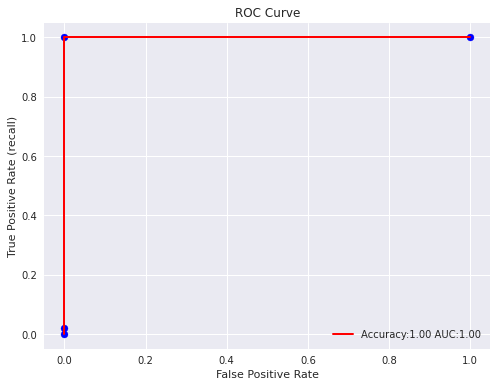

In [19]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid = {'gamma': ['auto', 'scale'], 'C': [1.0, 0.1, 0.01, 10.0]}, scoring="roc_auc", cv=5)
grid.fit(X, Y)
print('Best Parameters                               : ',grid.best_params_)
print('Best Score                                    : ',grid.best_score_)

decision_function = grid.best_estimator_.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, decision_function)

print('True Positive Rates                           : ', tpr)
print('False Positive Rates                          : ', fpr)
print('Different Thresholds For Calculating TPR, FPR : ', thresholds)
print('Classification Report                         : ')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

acc = grid.best_estimator_.score(X_test, Y_test)
auc = roc_auc_score(Y_test, decision_function)

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:%.2f AUC:%.2f" % (acc, auc), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best');

Best Parameters                               :  {'C': 0.1, 'gamma': 'auto'}
Best Score                                    :  0.9930396798719487
True Positive Rates                           :  [0.   0.02 1.   1.  ]
False Positive Rates                          :  [0. 0. 0. 1.]
Different Thresholds For Calculating TPR, FPR :  [2.00e+00 1.00e+00 8.62e-01 1.00e-07]
Classification Report                         : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



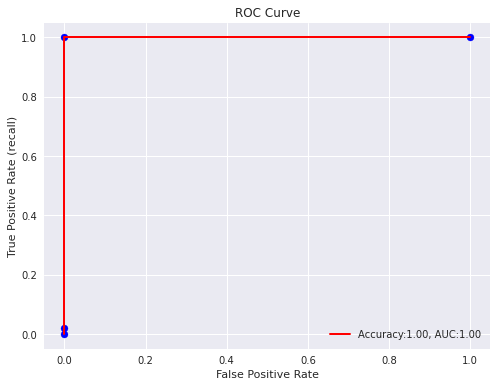

In [20]:
grid = GridSearchCV(SVC(probability=True),param_grid = {'gamma': ['auto', 'scale'], 'C': [1.0, 0.1, 0.01, 10.0]}, scoring="roc_auc", cv=5)
grid.fit(X, Y)
print('Best Parameters                               : ',grid.best_params_)
print('Best Score                                    : ',grid.best_score_)

probs = grid.best_estimator_.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, probs[:, 1])

print('True Positive Rates                           : ', tpr)
print('False Positive Rates                          : ', fpr)
print('Different Thresholds For Calculating TPR, FPR : ', thresholds)
print('Classification Report                         : ')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

acc = grid.best_estimator_.score(X_test, Y_test)
auc = roc_auc_score(Y_test, probs[:,1])

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(fpr, tpr, c='blue')
    plt.plot(fpr, tpr, label="Accuracy:%.2f, AUC:%.2f" % (acc, auc), linewidth=2, c='red')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (recall)")
    plt.title('ROC Curve')
    plt.legend(loc='best');

We can notice above from the classification report and ROC Curve that our model is performing quite well in the case of the imbalanced dataset after parameter tuning

## 8.5- Precision-Recall Curve

Precision and Recall helps a lot in case of imbalanced datasets. Plotting different values of precision vs recall by setting different thresholds helps in evaluating the performance of the model better in case of imbalance classes. It does not take into consideration true negatives as it's majority class and True positives represent minority class which has quite a few occurrences.

Note: It's restricted to binary classification tasks.

The below plot is Precision-Recall Curve for SVM on the unbalanced dataset test set.



In [ ]:
from sklearn.metrics import precision_recall_curve, auc,average_precision_score

decision_function = svc.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, decision_function)
acc = svc.score(X_test, Y_test)
p_auc = auc(recall, precision)

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(recall, precision, c='blue')
    plt.plot(recall, precision, label="Accuray:%.2f, AUC:%.2f" % (acc, p_auc), linewidth=2, c='red')
    plt.hlines(0.5,0.0,1.0, linestyle='dashed', colors=['orange'])
    plt.xlabel("Recall (Sensitivity)")
    plt.ylabel("Precision")
    plt.title('Precision Recall Curve')
    plt.legend(loc='best');

Precision-recall curve totally crashes if our model is not performing well in case of imbalanced dataset. Notice that AUC in case of precison recall curve is 50% and whereas AUC with ROC curve was around 90%. ROC curves sometimes give optimistic results hence its better to consider precision recall curves as well in case of imbalanced datasets.

Best Parameters                                        :  {'C': 1.0, 'gamma': 'auto'}
Best Score                                             :  0.9719999999999999
Precision                                              :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
Recall                                                 :  [1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18
 0.16 0.14 0.12 0.1  0.08 0.06 0.04 0.02 0.  ]
Different Thresholds For Calculating Precision, Recall :  [0.77 0.83 0.83 0.84 0.84 1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
 1.07 1.07 1.08 1.14 1.25 1.3  1.31 1.38 1.42 1.44 1.46 1.48 1.7  1.77
 2.12 2.24 2.3  2.33 2.42 2.57 2.71 3

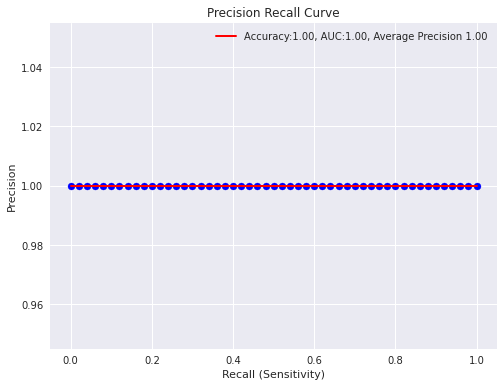

In [22]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(probability=True),param_grid = {'gamma': ['auto', 'scale'], 'C': [1.0, 0.1, 0.01, 10.0]}, cv=5)
grid.fit(X, Y)
print('Best Parameters                                        : ',grid.best_params_)
print('Best Score                                             : ',grid.best_score_)

decision_function = grid.best_estimator_.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, decision_function)

print('Precision                                              : ', precision)
print('Recall                                                 : ', recall)
print('Different Thresholds For Calculating Precision, Recall : ', thresholds)
print('Classification Report                                  : ')
print(classification_report(Y_test, grid.best_estimator_.predict(X_test)))

acc = grid.best_estimator_.score(X_test, Y_test)
p_auc = auc(recall, precision)
ap = average_precision_score(Y_test, grid.predict_proba(X_test)[:,1])

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(recall, precision, c='blue')
    plt.plot(recall, precision, label="Accuracy:%.2f, AUC:%.2f, Average Precision %.2f" % (acc, p_auc, ap), linewidth=2, c='red')
    plt.xlabel("Recall (Sensitivity)")
    plt.ylabel("Precision")
    plt.title('Precision Recall Curve')
    plt.legend(loc='best');

## 8.6 Log Loss (Logistic Loss or Cross-Entropy Loss)
Log loss refers to the negative log-likelihood of true labels predicted by the classifier. It's a cost function whose output classifiers try to minimize while updating weights of the model.

log_loss=−y∗log(y′)−(1−y)∗log(1−y′)
 

In [ ]:
from sklearn.metrics import log_loss

X, Y = datasets.make_classification(n_samples= 500)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y)
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

grid = GridSearchCV(SVC(probability=True),param_grid = {'C': [1.0, 0.1, 0.01, 10.0,]}, scoring="neg_log_loss", cv=5)
grid.fit(X, Y)

print('Best Parameters : ',grid.best_params_)
#print('Test Log Loss : %.3f'%grid.best_estimator_.score(X_test, Y_test))
#print('Train Log Loss : %.3f'%grid.best_estimator_.score(X_train, Y_train))
print('Test Log Loss   : %.3f'%log_loss(Y_test, grid.best_estimator_.predict_proba(X_test)))
print('Train Log Loss  : %.3f'%log_loss(Y_train, grid.best_estimator_.predict_proba(X_train)))
Y_preds = grid.best_estimator_.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

## 8.7. Zero One Classification Loss 
 It returns a number of misclassifications or a fraction of misclassifications. It accepts normalize parameter whose value if set True then returns a fraction of misclassifications else if set to False then it returns misclassifications.


In [ ]:
from sklearn.metrics import zero_one_loss

print('Number of Misclassificied Examples   : ',zero_one_loss(Y_test, Y_preds, normalize=False))
print('Fraction of Misclassificied Examples : ',zero_one_loss(Y_test, Y_preds))

## 8.8 Balanced Accuracy Score
It returns an average of recall of each class in classification problem. It's useful to deal with imbalanced datasets.

It has parameter adjusted which when set True results are adjusted for a chance so that the random performing model would get a score of 0 and perfect performance will get 1.0.

In [ ]:
from sklearn.metrics import balanced_accuracy_score

print('Balanced Accuracy          : ',balanced_accuracy_score(Y_test, Y_preds))
print('Balanced Accuracy Adjusted : ',balanced_accuracy_score(Y_test, Y_preds, adjusted=True))

## 8.9 -Brier Loss
It computes squared differences between the actual labels of class and predicted probability by model. It should be as low as possible for good performance. It’s for binary classification problems only. It by defaults takes 1 as positive class hence if one needs to consider 0 as a positive class then one can use the pos_label parameter as below.
    

In [ ]:
 from sklearn.metrics import brier_score_loss

print('Brier Loss                       : ',brier_score_loss(Y_test, grid.predict_proba(X_test)[:, 1]))
print('Brier Loss (0 as Positive Class) : ', brier_score_loss(Y_test, grid.predict_proba(X_test)[:, 0], pos_label=0))

## 8.10 F-Beta Score
F-Beta score refers to weighted average of precision and recall based on the value of the beta parameter provided. If beta < 1 then it lends more weight to precision, while beta > 1 lends more weight to recall. It has the best value of 1.0 and the worst 0.0.

It has a parameter called average which is required for multiclass problems. It accepts values [None, 'binary'(default), 'micro', 'macro', 'samples', 'weighted']. If None is specified then the score for each class is returned else average as per parameter is returned in a multiclass problem.


In [ ]:
from sklearn.metrics import fbeta_score

print('Fbeta Favouring Precision : ', fbeta_score(Y_test, Y_preds, beta=0.5))
print('Fbeta Favouring Recall    : ' ,fbeta_score(Y_test, Y_preds, beta=2.0))


## 8.11  Hamming Loss

it returns fraction of labels misclassified.


In [ ]:
from sklearn.metrics import hamming_loss

print('Hamming Loss : ', hamming_loss(Y_test, Y_preds))

# Regression Metrics
We'll now introduce model evaluation metrics for regression tasks. We'll start with loading the Boston dataset available in scikit-learn for our purpose.

In [ ]:
#X, Y = datasets.make_regression(n_samples=200, n_features=20, )
boston = datasets.load_boston()
X, Y = boston.data, boston.target
print('Dataset Size : ', X.shape, Y.shape)

In [ ]:
# We'll be splitting a dataset into train/test sets with 80% for a train set and 20% for the test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=1, )
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

We'll now initialize a simple LinearSVR model and train it on the train dataset. We'll then check its performance by evaluating various regression metrics provided by scikit-learn.

In [ ]:
from sklearn.svm import LinearSVR
svr = LinearSVR()
svr.fit(X_train, Y_train)

## 1- R2  (Coefficient Of Determination)
The coefficient of  R2  is defined as  (1−u/v) .

u=((ytrue−ypred)2).sum() 

v=((ytrue−ytrue.sum())2).sum() 

The best possible score is 1.0 and it can be negative as well if the model is performing badly. A model that outputs constant prediction for each input will have a score of 0.0.

Note: The majority of the regression model's score() method outputs this metric which is quite different from MSE(mean square error). Hence both should not be confused.

In [ ]:
from sklearn.metrics import r2_score
Y_preds = svr.predict(X_test)
print(Y_preds[:10])
print(Y_test[:10])
print('Test R^2     : %.3f'%r2_score(Y_test, Y_preds))
print('Test R^2     : %.3f'%svr.score(X_test, Y_test))
print('Training R^2 : %.3f'%svr.score(X_train, Y_train))

Below we are doing grid search through various values of parameter C of LinearSVR and using r2 as an evaluation metric whose value will be optimized.

In [ ]:
grid = GridSearchCV(LinearSVR(),param_grid = {'C': [1.0, 0.1, 0.01, 10.0,]}, scoring="r2", cv=5)
grid.fit(X, Y)

print('Best Parameters : ',grid.best_params_)
print('Best Score      : ',grid.best_score_)
print('Test R^2        : %.3f'%r2_score(Y_test, grid.best_estimator_.predict(X_test)))
print('Test R^2        : %.3f'%grid.best_estimator_.score(X_test, Y_test))
print('Training R^2    : %.3f'%grid.best_estimator_.score(X_train, Y_train))

Y_preds = grid.best_estimator_.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

## 2 Mean Absolute Error

Mean absolute error is a simple sum of the absolute difference between actual and predicted target value divided by a number of samples.

In [ ]:
from sklearn.metrics import mean_absolute_error
print('Test MAE  : %.3f'%mean_absolute_error(Y_test, Y_preds))
print('Train MAE : %.3f'%mean_absolute_error(Y_train, svr.predict(X_train)))


Below we are doing grid search through various values of parameter C of LinearSVR and using neg_mean_absolute_error as an evaluation metric whose value will be optimized.

In [ ]:
grid = GridSearchCV(LinearSVR(),param_grid = {'C': [1.0, 0.1, 0.01, 10.0,]}, scoring="neg_mean_absolute_error", cv=5)
grid.fit(X, Y)

print('Best Parameters : ',grid.best_params_)
print('Test MAE        : %.3f'%mean_absolute_error(Y_test, grid.best_estimator_.predict(X_test)))
print('Train MAE       : %.3f'%mean_absolute_error(Y_train, grid.best_estimator_.predict(X_train)))
Y_preds = grid.best_estimator_.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

## 3- Mean Squared Error
Mean Squared Error loss function simple sum of the squared difference between actual and predicted value divided by a number of samples.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

print('Test MSE  : %.3f'%mean_squared_error(Y_test, Y_preds))
print('Train MSE : %.3f'%mean_squared_error(Y_train, svr.predict(X_train)))

Below we are doing grid search through various values of parameter C of LinearSVR and using neg_mean_squared_error as an evaluation metric whose value will be optimized.

In [ ]:
grid = GridSearchCV(LinearSVR(),param_grid = {'C': [1.0, 0.1, 0.01, 10.0,]}, scoring="neg_mean_squared_error", cv=5)
grid.fit(X, Y)

print('Best Parameters : ',grid.best_params_)
print('Test MSE        : %.3f'%mean_squared_error(Y_test, grid.best_estimator_.predict(X_test)))
print('Train MSE       : %.3f'%mean_squared_error(Y_train, grid.best_estimator_.predict(X_train)))
Y_preds = grid.best_estimator_.predict(X_test)

print(Y_preds[:10])
print(Y_test[:10])

## 4 Mean Squared Log Error¶

It can not be used when target contains negative values/predictions.

In [ ]:
from sklearn.metrics import mean_squared_log_error

print(mean_squared_log_error(Y_test, Y_preds))

## 5 Median Absolute Error

In [ ]:
from sklearn.metrics import median_absolute_error

print('Median Absolute Error : ', median_absolute_error(Y_test, Y_preds))
print('Median Absolute Error : ', np.median(np.abs(Y_test - Y_preds)))

## 6 Explained Variance Score
It returns the explained variance regression score. The best value is 1.0 and fewer values refer to a bad model.

In [ ]:
from sklearn.metrics import explained_variance_score

print('Explained Variance Score : ', explained_variance_score(Y_test, Y_preds))

##7 Residual Error
It returns the max of the difference between actual values and the predicted value of all samples.

In [ ]:
from sklearn.metrics import max_error

print('Maximum Residual Error : ', max_error(Y_test, Y_preds))
print('Maximum Residual Error : ', max_error([1,2,3,4], [1,2,3.5,7])) ## here 4th sample has highest difference


# Clustering Metrics
We'll now introduce evaluation metrics for unsupervised learning - clustering tasks.

## 1-Adjusted Rand Score

Clustering algorithms return cluster labels for each cluster specified but it might not return in the same sequence as original labels. It might happen that in the original dataset some class has samples labeled as 1 and in predictions by cluster, an algorithm can label it as other than 1.

We'll use the IRIS dataset and KMeans for explanation purposes.We'll even plot results to show the difference. We'll how accuracy will improve once we use adjusted_rand_score as an evaluation function.

In [ ]:
from sklearn.cluster import KMeans, MeanShift
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix

iris = load_iris()
X, Y = iris.data, iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=12)
print('Train/Test Sizes  : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train, Y_train)
Y_preds = kmeans.predict(X_test)

#print(Y_test, Y_preds)
print('Confusion Matrix : ')
print(confusion_matrix(Y_test, Y_preds))
print('Accuracy of Model : %.3f'%accuracy_score(Y_test, Y_preds))
print('Adjusted Accuracy : %.3f'%adjusted_rand_score(Y_test, Y_preds))

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.scatter(X_test[: , 1], X_test[:, 2], c=Y_test, cmap = plt.cm.viridis)
    plt.xlabel(iris.feature_names[1])
    plt.ylabel(iris.feature_names[2])
    plt.title('Y Original')
    plt.subplot(122)
    plt.scatter(X_test[: , 1], X_test[:, 2], c=Y_preds, cmap = plt.cm.viridis)
    plt.xlabel(iris.feature_names[1])
    plt.ylabel(iris.feature_names[2])
    plt.title('Y Predicted');

##2-Custom Scoring Function
Users can also define their own scoring function if their scoring function is not available in built-in scoring functions of sklearn. In GridSearchCV and cross_val_score, one can provide object which has __call__ method or function to scoring parameter. Object or function both need to accept estimator object, test features(X) and target(Y) as input and return float.

Below we are defining RMSE (Root Mean Squared Error) as a class and as a function as well. We'll then use it in cross_val_score() to check performance also compares it's value with negative of neg_mean_squared_error.

In [ ]:
class RootMeanSquareError(object):
    def __call__(self, model, X, Y):
        Y_preds = model.predict(X)
        return np.sqrt(((Y - Y_preds)**2).mean())

def rootMeanSquareError(model, X, Y):
    Y_preds = model.predict(X)
    return np.sqrt(((Y - Y_preds)**2).mean())

lsvr = LinearSVR(random_state=1)
print('Cross Val Score Using Object                                     : ',cross_val_score(lsvr, X, Y, scoring=RootMeanSquareError()))
print('Cross Val Score Using Function                                   : ', cross_val_score(lsvr, X, Y, scoring=rootMeanSquareError))
print('Cross Val Score Using Negative Mean Squared Error                : ', -1*cross_val_score(lsvr, X, Y, scoring='neg_mean_squared_error'))
print('Cross Val Score Using Square Root of Negative Mean Squared Error : ', np.sqrt(-1*cross_val_score(lsvr, X, Y, scoring='neg_mean_squared_error')))

Below are list of scikit-learn builtin functions.

In [ ]:
print('List of Inbuilt Scorers : ')
sklearn.metrics.SCORERS

References:
Model Evaluation & Scoring Matrices
https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn